## TASK 2.1

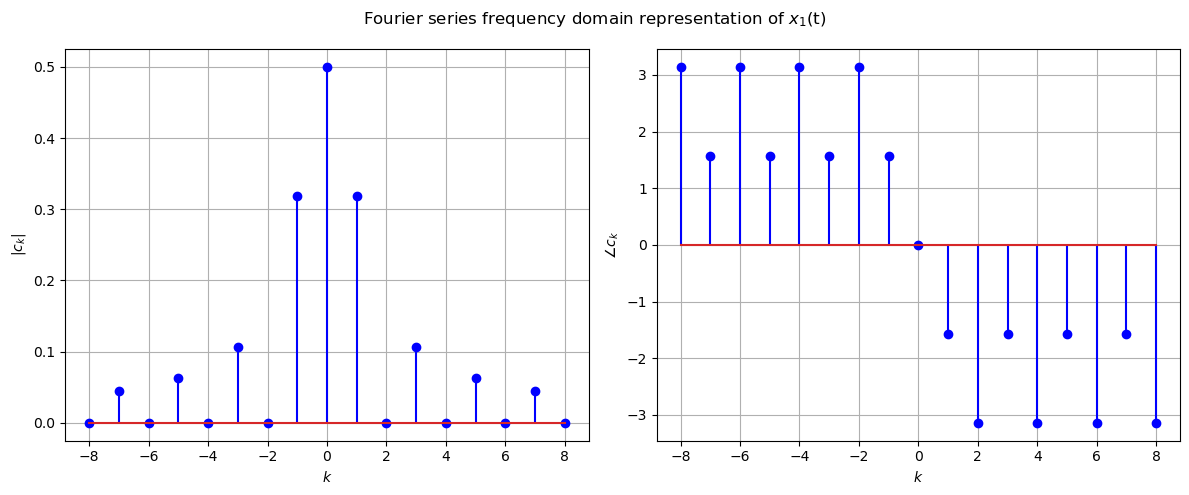

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def fsrrec(ckv,omega0,tv):
    """Generate samples from real Fourier series representation"""
    xv = ckv[0]*np.ones(tv.shape) # Set all values to c0 initially
    for k in range(1,len(ckv)): 
        xv = xv + 2*np.abs(ckv[k])*np.cos(k*omega0*tv + np.angle(ckv[k]))
    return(np.real(xv))
# end def

# define variables
T = 8 # period
N = 8 # maximum number of terms
omega0 = 2*np.pi/T
t0 = 2 #time shift
kv = np.arange(-8,9) # k values

def maunual_coef_calc(k, omega0, T):
    """This is to calculate the coefficient values for k in [-8,8]"""
    if k == 0:
        """To prevent divide by 0 error"""
        return 4/T
    else:
        """For rest of function, including shift of x1(t) = X(t-2)"""
        return 2/(k*omega0*T)*np.sin(2*k*omega0)*np.exp(-1j*omega0*k*t0)

# create array containing calculated coefficients
ckv = np.array([maunual_coef_calc(k, omega0, T) for k in kv])

# plot the output
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # make graph 1 active
plt.stem(kv, np.abs(ckv), 'b')
plt.suptitle('Fourier series frequency domain representation of $x_1$(t)')
plt.xlabel('$k$')
plt.ylabel(r'$|c_k|$')
plt.grid(True)

plt.subplot(1, 2, 2) # make graph 2 active
plt.stem(kv, np.angle(ckv), 'b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel(r'$\angle c_k$')
plt.grid(True)
plt.tight_layout()

## TASK 2.2

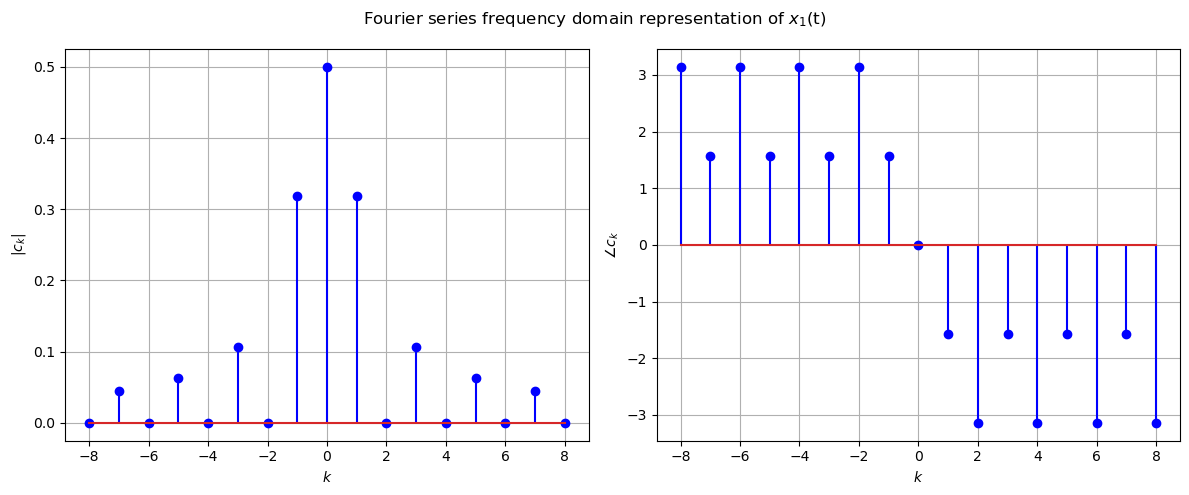

In [68]:
import sympy as sp
from sympy import I

"""Due to the integral only evaluating the area between -T/2
    and T/2, the rest of the piecwise would yield an area of 0. 
    Therfore the piecewise is only defined for only this range to
    prevent too much processing"""

t = sp.symbols('t')
# piecewise x_2(t)
x = sp.Piecewise( (0, t<0), (1, t<4), (0, True))

Ts, k, w0 = sp.symbols('Ts k w0')
w0 = 2*np.pi/Ts
expt = sp.exp(-I*k*w0*t)
cke = 1/Ts*sp.integrate(x*expt, (t, -Ts/2, Ts/2))
# substitute T in place of Ts
ck = cke.subs(Ts,T).doit()

kv = np.arange(-8,9) # -8<= k <= 8
ckvs = np.zeros(kv.shape, dtype=np.complex64)
for i in range(len(kv)):
    # substitute each value of k and store in ckvs array
    ckvs[i] = ck.subs({k:kv[i]}).evalf()

# plot the output
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # make graph 1 active
plt.stem(kv, np.abs(ckv), 'b')
plt.suptitle('Fourier series frequency domain representation of $x_1$(t)')
plt.xlabel('$k$')
plt.ylabel(r'$|c_k|$')
plt.grid(True)

plt.subplot(1, 2, 2) # make graph 2 active
plt.stem(kv, np.angle(ckv), 'b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel(r'$\angle c_k$')
plt.grid(True)
plt.tight_layout()

## TASK 2.3

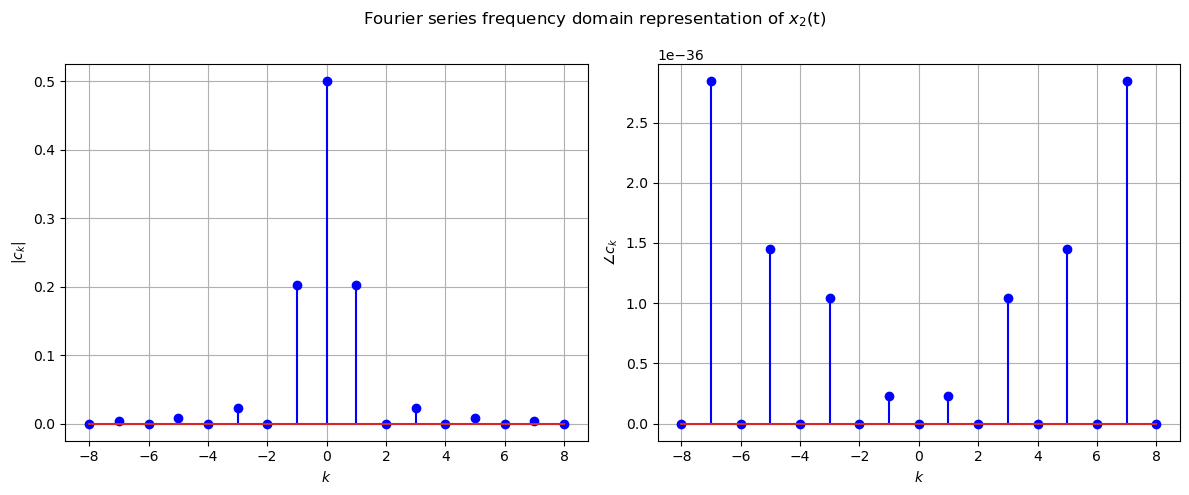

In [53]:
T = 2 # period of triangular wave
t = sp.symbols('t')

"""Due to the integral only evaluating the area between -T/2
    and T/2, the rest of the piecwise would yield an area of 0. 
    Therfore the piecewise is only defined for only this range to
    prevent too much processing"""

x2 = sp.Piecewise((t + 1, (t > -1) & (t <= 0)), # for increasing part
                 (-t + 1, (t >= 0) & (t <= 1)), # for decreasing part
                 (0, True) # default
                 )  

Ts, k, w0 = sp.symbols('Ts k w0')
w0 = 2*np.pi/Ts
expt = sp.exp(-I*k*w0*t)
cke = 1/Ts*sp.integrate(x2*expt, (t, -Ts/2, Ts/2))
# substitute T in place of Ts
ck = cke.subs(Ts,T).doit()

# as per the example code
kv = np.arange(-8,9)
ckvs = np.zeros(kv.shape, dtype=np.complex64)
for i in range(len(kv)):
    ckvs[i] = ck.subs({k:kv[i]}).evalf()

# plot the output
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.stem(kv, np.abs(ckvs), 'b')
plt.suptitle('Fourier series frequency domain representation of $x_2$(t)')
plt.xlabel('$k$')
plt.ylabel(r'$|c_k|$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(kv, np.angle(ckvs), 'b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel(r'$\angle c_k$')
plt.grid(True)

plt.tight_layout()
plt.show()

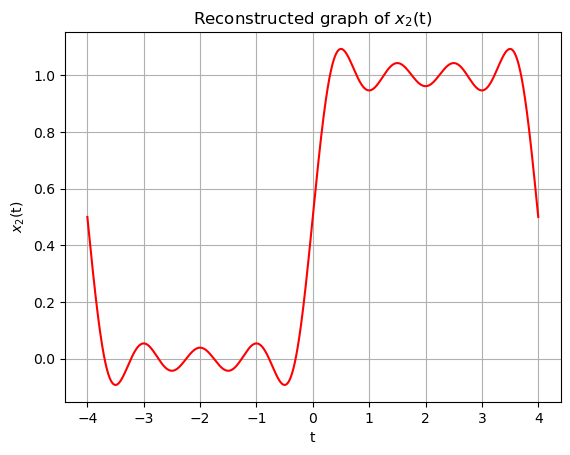

In [76]:
# beacuse fsrrec can only take positive values
kzi = np.where(kv==0)[0][0] # Index for zero element
ckvsp = ckvs[kzi:]

# plot the reconstructed graph
tv = np.linspace(-4,4,10000)
xv = fsrrec(ckvsp,2*np.pi/T,tv)
fh = plt.figure()
plt.title('Reconstructed graph of $x_2$(t)')
plt.plot(tv, np.real(xv), 'r')
plt.xlabel('t'); plt.ylabel('$x_2$(t)')
plt.grid(True)

## TASK 2.4

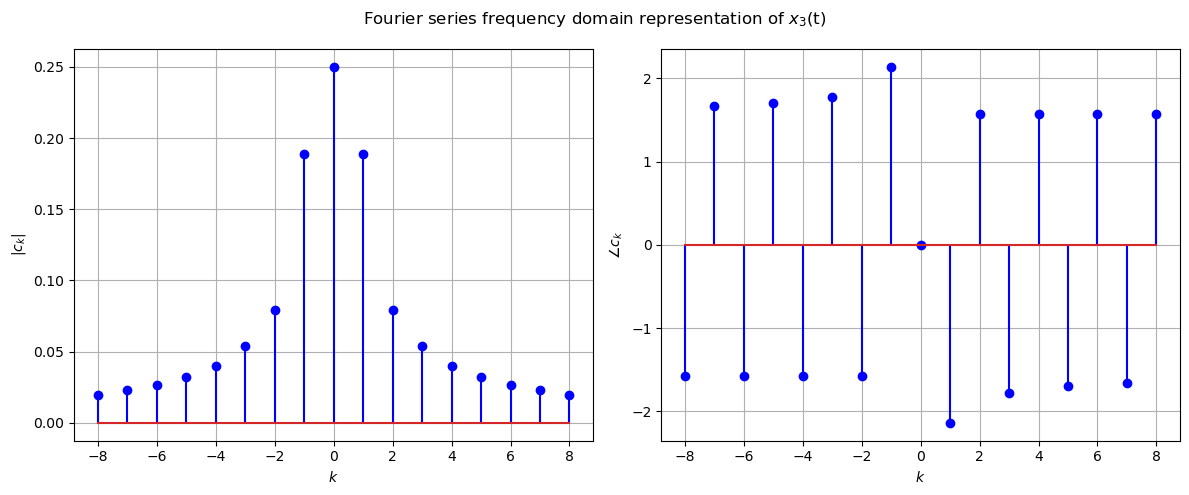

In [78]:
T = 2 # period of triangular wave
t = sp.symbols('t')
# piecewise for saw tooth function
"""Due to the integral only evaluating the area between -T/2
    and T/2, the rest of the piecwise would yield an area of 0. 
    Therfore the piecewise is only defined for only this range to
    prevent too much processing"""
x = sp.Piecewise((0, (t<0)), (t, (t>=0)), (0, True))  

Ts, k, w0 = sp.symbols('Ts k w0')
w0 = 2*sp.pi/Ts
expt = sp.exp(-I*k*w0*t)
cke = 1/Ts*sp.integrate(x*expt, (t, -Ts/2, Ts/2))
# substitute T in place of Ts
ck = cke.subs(Ts,T).doit()

# as per the example code
kv = np.arange(-8,9)
ckvs = np.zeros(kv.shape, dtype=np.complex64)
for i in range(len(kv)):
    ckvs[i] = ck.subs({k:kv[i]}).evalf()
    
# plot the output
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.stem(kv, np.abs(ckvs), 'b')
plt.suptitle('Fourier series frequency domain representation of $x_3$(t)')
plt.xlabel('$k$')
plt.ylabel(r'$|c_k|$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.stem(kv, np.angle(ckvs), 'b', markerfmt='bo')
plt.xlabel('$k$')
plt.ylabel(r'$\angle c_k$')
plt.grid(True)

plt.tight_layout()
plt.show()